# Ford GoBike System Data


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb



%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [5]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)


(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [6]:
#Understand the presence of Customers 
Sub = df[df.user_type == 'Customer'].count()
Sub

duration_sec               19868
start_time                 19868
end_time                   19868
start_station_id           19801
start_station_name         19801
start_station_latitude     19868
start_station_longitude    19868
end_station_id             19801
end_station_name           19801
end_station_latitude       19868
end_station_longitude      19868
bike_id                    19868
user_type                  19868
member_birth_year          16631
member_gender              16631
bike_share_for_all_trip    19868
dtype: int64

In [7]:
#Count the number of Custs
len(df[df['user_type' ] == 'Customer'])

19868

In [8]:
# Counts the Number of Subs
len(df[df['user_type' ] == 'Subscriber'])

163544

In [9]:
#Convert Times to_dateTime 
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])


In [10]:
#Add Days of the month, week, and hour that bikes were used. 

df['day'] = df.start_time.dt.strftime('%A')
df['Day'] = df.start_time.dt.day
df['Hour'] = df.start_time.dt.hour


In [11]:
#Min max date
a = df.start_time.max().strftime('%Y-%m-%d')
b = df.start_time.min().strftime('%Y-%m-%d')

c = df.duration_sec.max()
d = df.duration_sec.min()

e = df[df.user_type == 'Subscriber'].duration_sec.mean()
f = df[df.user_type == 'Customer'].duration_sec.mean()

# are subscribers consistent riders 

g = df[df.user_type == 'Subscriber'].nunique().count()
h = df[df.user_type == 'Customer'].nunique().count()

#count the average time a subscriber or Customer uses the bikes 
print(df[df.user_type == 'Customer'].nunique().value_counts().mean())
print(df[df.user_type == 'Subscriber'].nunique().value_counts().mean())
print(" ")

print(""""The recorded rides are from {} to {}
        \nMax and least time duration in seconds being {} and {} 
        \nAverage duration for a subscriber {} 
        \nAverage duration for a Customer {}
        \nNumber of unique Subscirbers {}
        \nNumber of unique Customer {}
        
        """.format(b,a,c,d, e, f, g, h))


1.3571428571428572
1.4615384615384615
 
"The recorded rides are from 2019-02-01 to 2019-02-28
        
Max and least time duration in seconds being 85444 and 61 
        
Average duration for a subscriber 640.2636782761825 
        
Average duration for a Customer 1432.465019126233
        
Number of unique Subscirbers 19
        
Number of unique Customer 19
        
        


In [12]:
# we need to know the distance between the start and end locations 
from math import sin, cos, sqrt, atan2, radians

dis = []

for h,i,j,k in zip( df.start_station_latitude, df.start_station_longitude, df.end_station_latitude, df.end_station_longitude ):
    # approximate radius of earth in km
    R = 6378.0

    lat1 = radians(h)
    lon1 = radians(i)
    lat2 = radians(j)
    lon2 = radians(k)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    
    dis.append(distance)


   

In [13]:
#add list to Dataframe 
df['Distance'] = dis 

In [14]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day,Day,Hour,Distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,28,17,0.545307
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,Thursday,28,18,1.744914
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,28,12,2.707517
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,28,17,0.261025
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,28,23,2.411949


In [15]:
df.to_csv('df.csv')

# What is the structure of your dataset?

There are 183,412 recorded rides in the dataset with 16 features. Most of which are numeric and some are objects.  

### What is/are the main feature(s) of interest in your dataset?

-duration_sec                 
-start_time and end_time                    
-start station id and end station id 
-Start and end latitude and longitude
-start station name  and end station name            
-user_type ( were they a Subscriber? )                 
-member_birth_year          
-member_gender              
  



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

If they choose to subsribe then my assumption is they did not want to miss out on discounts of deals since they intended to use the bikes often. 

## Univariate Exploration

Ill start by looking at each variable to see if they have a corrilation with User type, Usage, and Gender. 

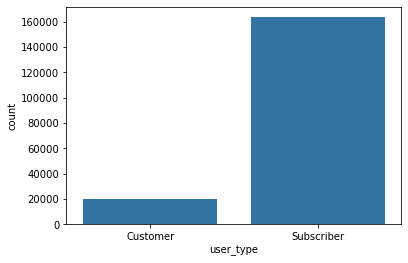

In [16]:
# Who used the bikes more during February. 
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='user_type', color=base_color);

It Looks like there is a greatter count of Subscibers then Customers for the month of February. Something that is expected from Subscribers. 

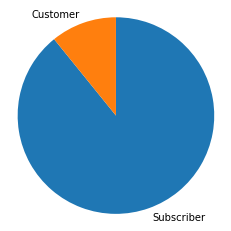

In [17]:
#Customers to subscribers 
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square');

Again there is a greater proportion of Subscribers to Customers

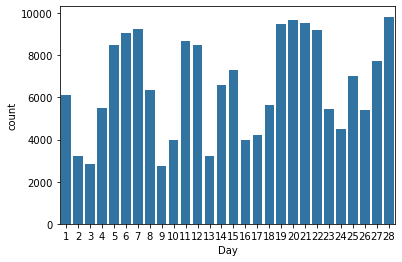

In [18]:
#Bike usage throughout the month of February 
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='Day', color=base_color);

It looks like there is a drop every weekend during the Month of February.

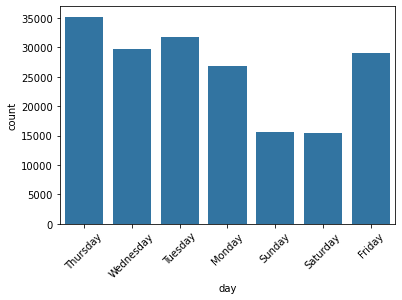

In [19]:
#Bike usage throughout the week 

base_color = sb.color_palette()[0]
sb.countplot(data=df, x='day', color=base_color);
plt.xticks(rotation = 45);

It looks like over all there is more usage activity during the weekdays and then a drop during the weekend. 

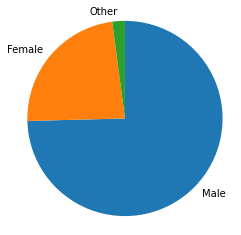

In [20]:
# Males to Females in the data 
sorted_counts = df['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square');

There is significantly more men riding bikes then there are women or other genders. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I am interested in looking at how the usage of the customers and Subscirbers differ throughout the week and seeing if being a subscriber really does make a difference. A difference in how long they ride for and the kind of distance that is covered. I want to answer whether companys should try to have more subscirbers. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

One of the variabels thaht i had to adjust was the time to be able to catergorize the days of the month, and the month date along with it. I also had to know the distance between each start and end location to know how the distance of each Bike ride. 

## Bivariate Exploration

To start off with, I want to look at the the relations ships that being a Customer or Subsciber has with how long and hwo far you bike. 

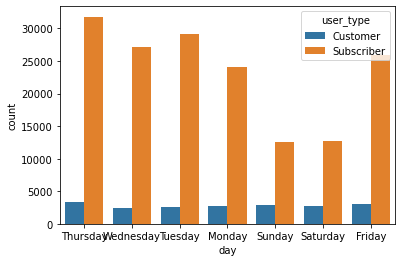

In [21]:
#Do Custmers use the bike or Subscibers. 
sb.countplot(data = df, x = 'day', hue = 'user_type')

Subscibers will always surpass customers in the number of time they will want to ride bikes. 

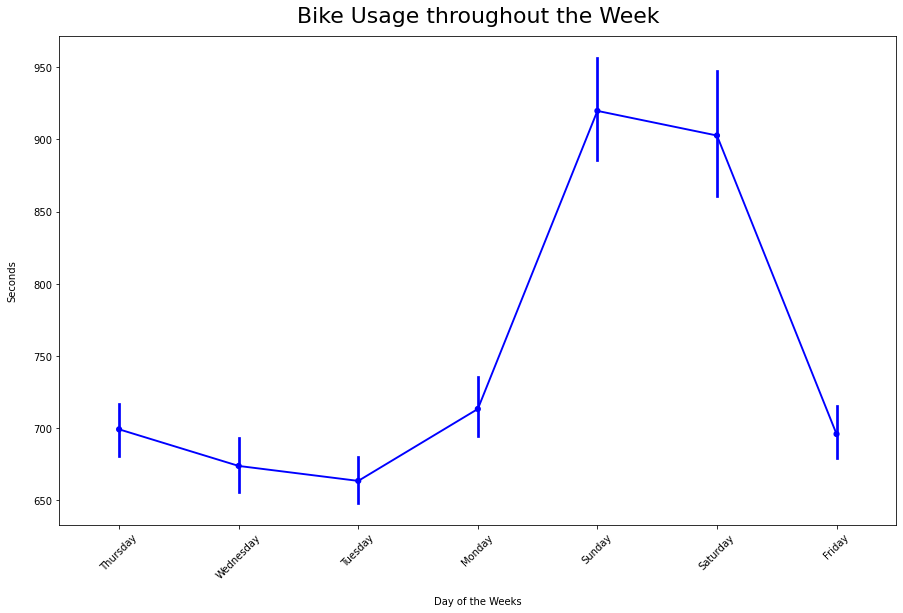

In [22]:
plt.figure(figsize=(15,9))
sb.pointplot(data = df, x='day', y='duration_sec', scale=.7, color='blue')
plt.title('Bike Usage throughout the Week', fontsize=22, y=1.015)
plt.xlabel('Day of the Weeks', labelpad=16)
plt.ylabel('Seconds', labelpad=16)
plt.xticks(rotation = 45);

People will tend to have longer rides during the weekend, people are not commuting as much they are mostly riding recreationally. 

Text(0.5, 0.98, 'Duration on Each Bike ')

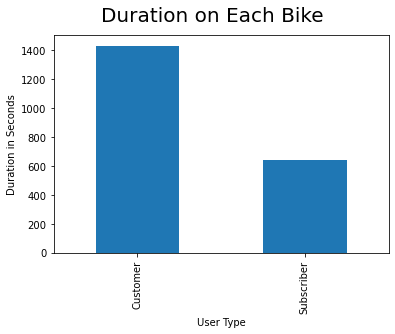

In [23]:
#Customers tend to spend longer times on the bike then subscribers 
df.groupby('user_type').duration_sec.mean().plot(kind = 'bar');
plt.ylabel('Duration in Seconds', fontsize = 10)
plt.xlabel('User Type',fontsize = 10 )
plt.suptitle('Duration on Each Bike ', fontsize = 20)

I did not expect that it would be customers on average that have longer lasting rides but it might make sense since 
when they do decide to ride it is most often for recreation then commuting where Subscribers tend to know they use the
bikes a lot and dont spend long amounts of time on each ride. 

Text(0.5, 0.98, 'Average Distances')

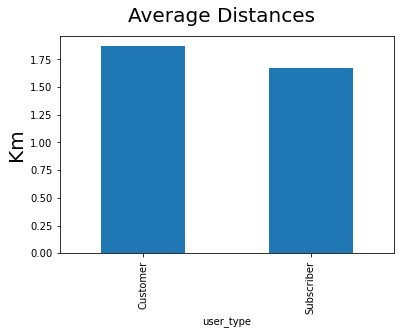

In [24]:
#Customers on average go farther distances but there isnt a huge difference. 

df.groupby('user_type').Distance.mean().plot(kind = 'bar');
plt.ylabel('Km', fontsize = 20)

plt.suptitle('Average Distances', fontsize = 20)

Its is also shocking to know that customers on average spend longer times and travel the farthest distance. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

It was interesting to see that customer are definetly more casual then subscibers when they choose to ride bikes, they
tend to ride them for longer times and for farther distances then the subscribers do. It can also be expected that 
subscirbers are more regular with how often they us the bikes as they ride them during the week which might mean that they use them to commute to work. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Men tend to ride bikes more than any other gender. 


## Multivariate Exploration

First, I will analyze the distributions between customer and subscriber, based on gender, and on weekday and monthly  usage.



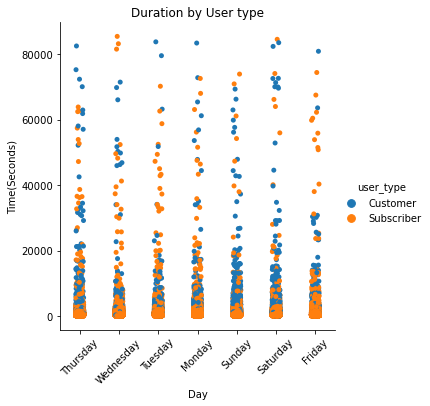

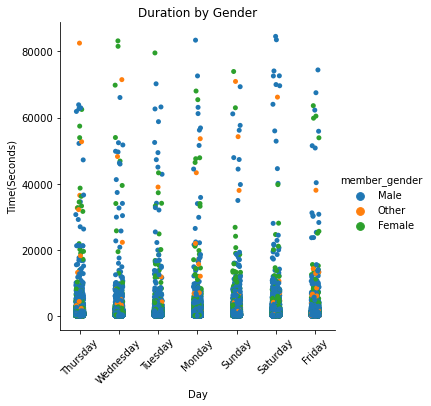

In [25]:
#which Gender and user type spends the most time on the bike. 
g = sb.catplot(x="day", y="duration_sec", hue="user_type", data=df);
plt.xticks(rotation=45);
plt.title('Duration by User type');
plt.ylabel('Time(Seconds)');
plt.xlabel('Day');

g = sb.catplot(x="day", y="duration_sec", hue="member_gender", data=df);
plt.xticks(rotation=45);
plt.title('Duration by Gender');
plt.ylabel('Time(Seconds)');
plt.xlabel('Day');


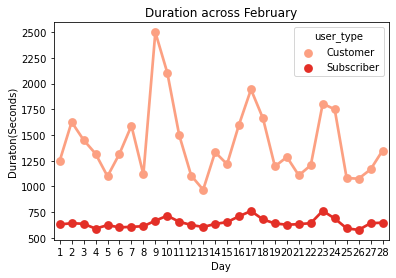

In [26]:
# Which USER_TYPE( Customer / Subscriber) spends longer times on the bike. 

sb.pointplot(data = df, x = 'Day', y = 'duration_sec', hue = 'user_type', palette = 'Reds', ci=None)
plt.title('Duration across February')
plt.ylabel('Duraton(Seconds)')
plt.xlabel('Day')
plt.show();

There is never a moment through out the month were a customer does not outride a subscriber. Ther alway spend a significant longer time on the bike

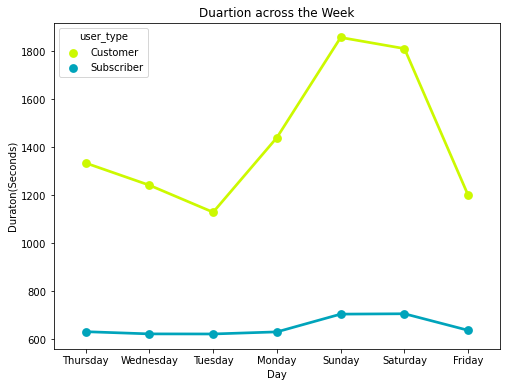

In [27]:
#Deeper look into the TIME the user has on the bike 
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df, x = 'day', y = 'duration_sec', hue = 'user_type', palette = 'nipy_spectral_r', ci=None)
plt.title('Duartion across the Week')
plt.ylabel('Duraton(Seconds)')
plt.xlabel('Day')
plt.show();

This graph makes it obvious that Customers use the bike more recreatonally as they mostly use them during the weekend. There is also a spike in usage for Subsribers but not as significant as Customers. 

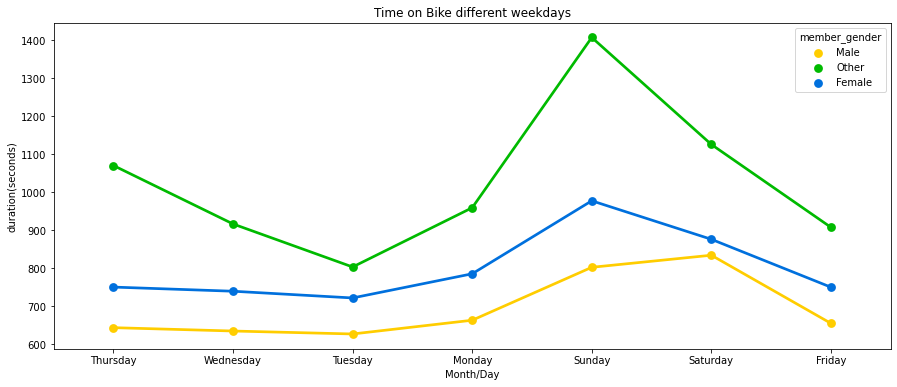

In [28]:
#Duration across the week from different genders. 
fig = plt.figure(figsize = [15,6])
sb.pointplot(data = df, x = 'day', y = 'duration_sec', hue = 'member_gender', palette = 'nipy_spectral_r', ci=None)
plt.title('Time on Bike different weekdays')
plt.ylabel('duration(seconds)')
plt.xlabel('Month/Day')
plt.show();

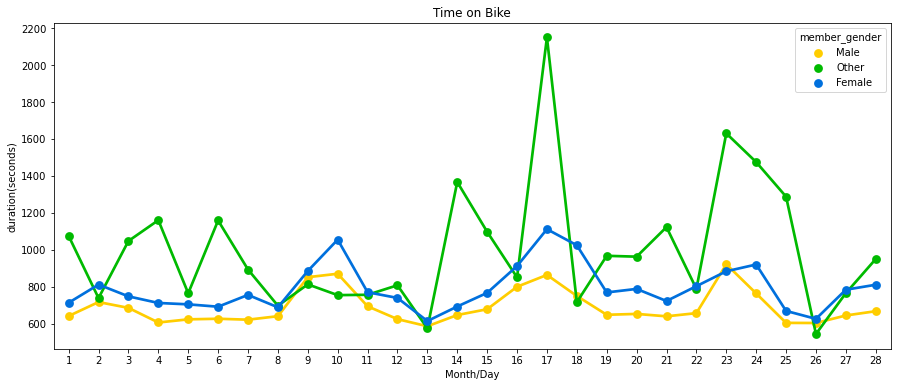

In [29]:
#Duration across the week from different genders. 
fig = plt.figure(figsize = [15,6])
sb.pointplot(data = df, x = 'Day', y = 'duration_sec', hue = 'member_gender', palette = 'nipy_spectral_r', ci=None)
plt.title('Time on Bike')
plt.ylabel('duration(seconds)')
plt.xlabel('Month/Day')
plt.show();

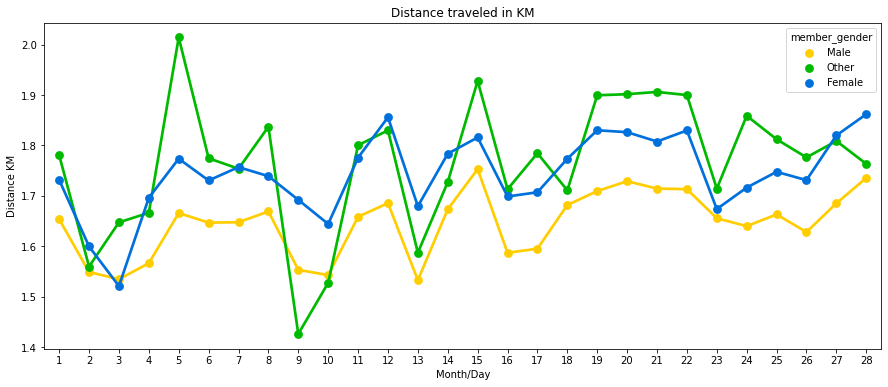

In [30]:
#Distance across the month from different genders. 
fig = plt.figure(figsize = [15,6])
sb.pointplot(data = df, x = 'Day', y = 'Distance', hue = 'member_gender', palette = 'nipy_spectral_r', ci=None)
plt.title('Distance traveled in KM')
plt.ylabel('Distance KM')
plt.xlabel('Month/Day')
plt.show();

It is interesting that woman tend to ride longer and farther the men on most day in February.  

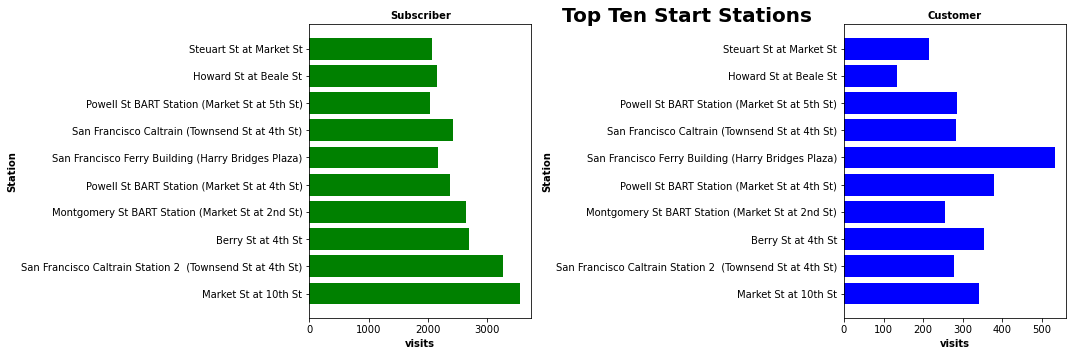

In [31]:
# Top ten start stations by different users 

df_sub = df.query('user_type == "Subscriber"').start_station_name.value_counts(ascending=True)
q = df.start_station_name.value_counts().nlargest(10)
q
q = q.index[0:10] 
q = q.astype('category')



plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.barh(q,df_sub[q],color='Green',  align='center');
plt.title('Subscriber', fontweight='semibold', fontsize=10)
plt.ylabel('Station', fontweight='semibold', fontsize=10)
plt.xlabel('visits', fontweight='semibold', fontsize=10)

plt.subplot(1, 2, 2)
df_Cus = df.query('user_type == "Customer"').start_station_name.value_counts(ascending=True)
plt.barh(q,df_Cus[q],color='blue', align='center');
plt.title('Customer', fontweight='semibold', fontsize=10)
plt.ylabel('Station', fontweight='semibold', fontsize=10)
plt.xlabel('visits', fontweight='semibold', fontsize=10)

plt.suptitle('                                           Top Ten Start Stations', fontsize=20, fontweight='semibold')

plt.tight_layout() 

It is  proabably good to know that these are the top Ten station for reasons that there need to be more bikes placed there. It is also interesting at that both customers and Subscibers have the same start location, this probably means that they are optimally placed since subscirbers and Customers often have different reason to ride, these bikes are placed to suite both their needs which makes the company efficient. 

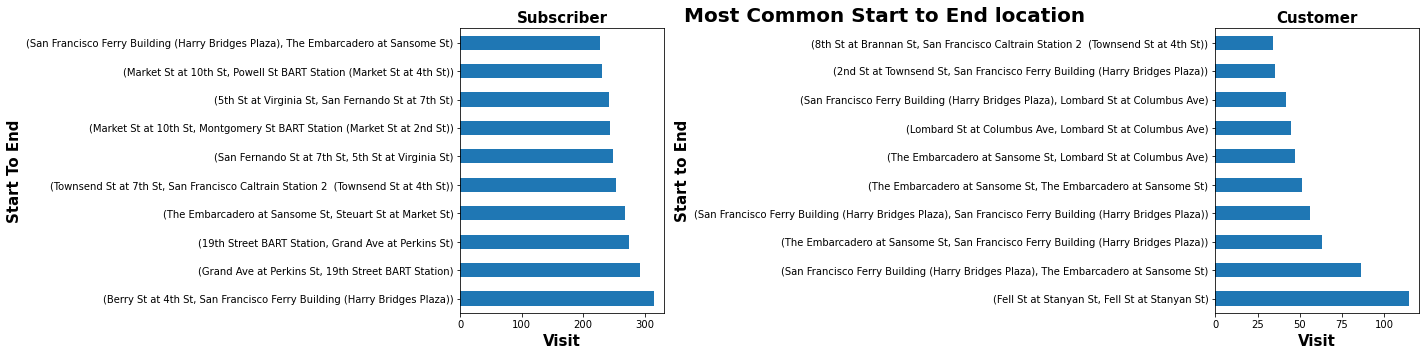

In [32]:
# What is a Customers / Subscribers usual start and end location. 

plt.figure(figsize=(20,5))

plt.suptitle('                                                 Most Common Start to End location ', fontsize=20, fontweight='semibold')

plt.subplot(1, 2, 1)
count_series = df.query('user_type == "Subscriber"').groupby(['start_station_name', 'end_station_name']).size().nlargest(10)
count_series.plot(kind = 'barh')
plt.title('Subscriber', fontweight='semibold', fontsize=15)
plt.ylabel('Start To End',fontweight='semibold', fontsize=15)
plt.xlabel('Visit',fontweight='semibold', fontsize=15)

plt.subplot(1, 2, 2)
count_se = df.query('user_type == "Customer"').groupby(['start_station_name', 'end_station_name']).size().nlargest(10)
count_se.plot(kind = 'barh')
plt.title('Customer', fontweight='semibold', fontsize=15)
plt.ylabel('Start to End', fontweight='semibold', fontsize=15)
plt.xlabel('Visit', fontweight='semibold', fontsize=15)



plt.tight_layout() 

While we can see that the Custoemrs have lower visiting numbers than Subscibers , We can also see that they have entirely different rout probably because of the commute vs recreational use. 

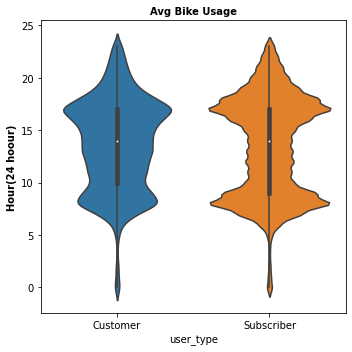

In [33]:
# Here were can see where on any average the bike usage hours pick up and slow down. 

plt.figure(figsize=(5,5))
sb.violinplot(data=df, x='user_type', y='Hour');

plt.title('Avg Bike Usage', fontweight='semibold', fontsize=10)
plt.ylabel('Hour(24 hoour)', fontweight='semibold', fontsize=10)



plt.tight_layout() 

This graph helps us see on average the busiest hours of the day for Bike riding. It looks liek its either early in the
mornign or later in the afternoon. 

Text(0.5, 69.0, 'Hour')

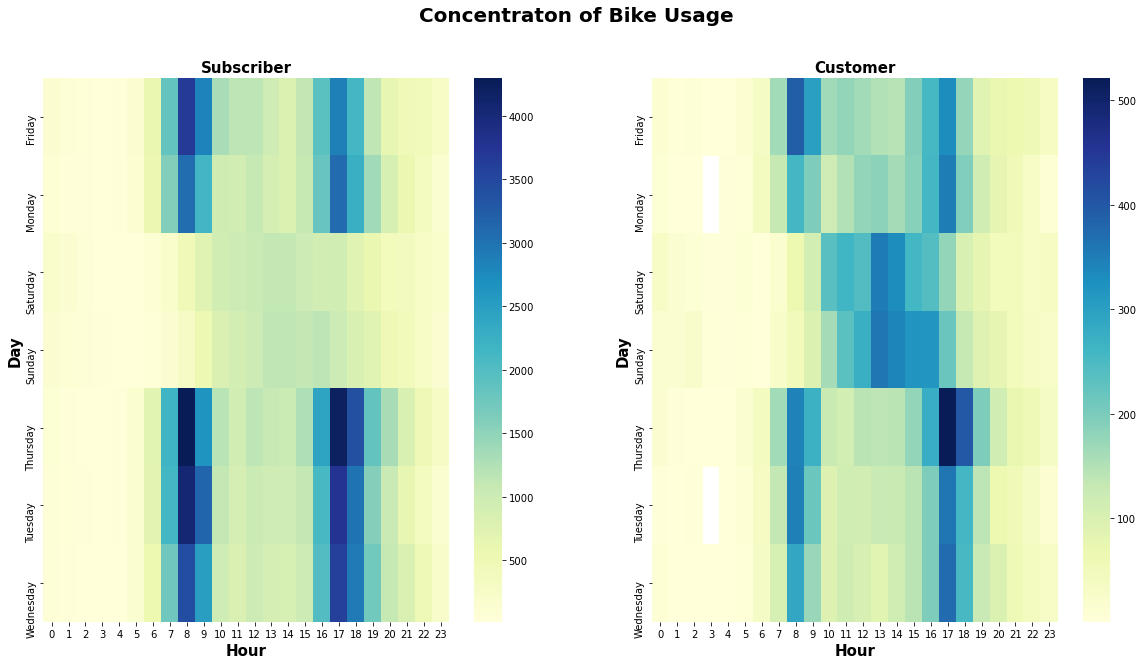

In [34]:
#Here we can see the concentraton of BIKE USAGE during the HOURS of the WEEKDAYS. 

df_sub = df.query('user_type == "Subscriber"').groupby(["day", "Hour"])["bike_id"].size().reset_index();
df_cust = df.query('user_type == "Customer"').groupby(["day", "Hour"])["bike_id"].size().reset_index();

plt.figure(figsize=(20,10));

plt.suptitle('Concentraton of Bike Usage  ', fontsize=20, fontweight='semibold')


df_sub = df_sub.pivot("day", "Hour", "bike_id");
df_cust = df_cust.pivot("day", "Hour", "bike_id");
plt.subplot(1, 2, 1);
sb.heatmap(df_sub, cmap="YlGnBu");
plt.title('Subscriber', fontweight='semibold', fontsize=15)
plt.ylabel('Day', fontweight='semibold', fontsize=15)
plt.xlabel('Hour', fontweight='semibold', fontsize=15)


plt.subplot(1, 2, 2);
    
sb.heatmap(df_cust, cmap="YlGnBu");
plt.title('Customer', fontweight='semibold', fontsize=15)
plt.ylabel('Day', fontweight='semibold', fontsize=15)
plt.xlabel('Hour', fontweight='semibold', fontsize=15)



### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The multivariate charts above have the same observations made in previous charts. The Customers prefer to ride for longer perods of time and travel father. Customers also prefer to bike during the weeekend while the Subscribers are more consistent and prefer to ride during the week days . We can also see the subscribers and customers have very differnt routs. But while they have different routes we can also see that both subscribers and customers have simialar start locations so we can conclude that the company is being effecient with how they place their bike because its suiting the needs of two different types of customers. 



### Were there any interesting or surprising interactions between features?

Gender is also interesting because while there are more men biking, Women in February tend to ride for longer periods of time and bike farther. 


